#**Import libraries**

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#**Load IMDB dataset**

In [20]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)

print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test))
print("Example review (first 20 word indices):", x_train[0][:20])
print("Label:", y_train[0])

Number of training samples: 25000
Number of test samples: 25000
Example review (first 20 word indices): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]
Label: 1


#**Preprocess data (Padding sequences)**

In [21]:
maxlen = 200

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (25000, 200)
Test data shape: (25000, 200)


#**Build the model (Embedding + LSTM + Dense layers)**

In [22]:
model = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#**Train the model**

In [23]:
model.summary()

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5578 - loss: 0.6669 - val_accuracy: 0.8280 - val_loss: 0.3932
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8683 - loss: 0.3225 - val_accuracy: 0.8542 - val_loss: 0.3424
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9143 - loss: 0.2309 - val_accuracy: 0.8496 - val_loss: 0.3637
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9357 - loss: 0.1795 - val_accuracy: 0.8742 - val_loss: 0.3414
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9531 - loss: 0.1353 - val_accuracy: 0.8438 - val_loss: 0.3898


#**Evaluate the model and plot accuracy curves**

In [24]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 84.26%


#**Plot ROC Curve**

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


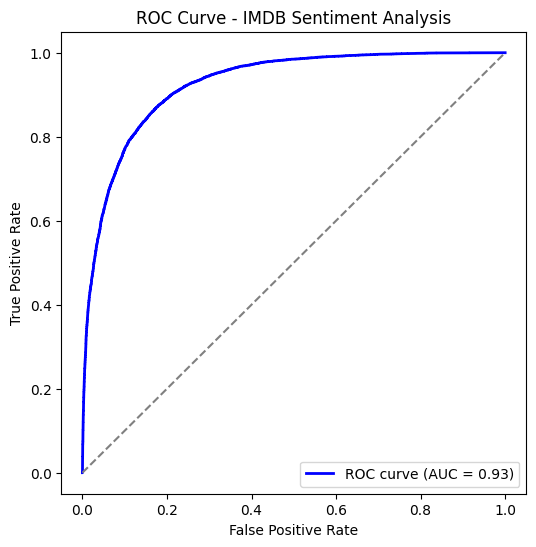

In [25]:
y_pred_prob = model.predict(x_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - IMDB Sentiment Analysis")
plt.legend(loc="lower right")
plt.show()


#**Test the model on a custom review**

In [27]:
word_index = keras.datasets.imdb.get_word_index()
index_word = {v+3:k for k,v in word_index.items()}
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"

def encode_text(text):
    tokens = text.lower().split()
    encoded = [1]
    for word in tokens:
        if word in word_index:
            encoded.append(word_index[word]+3)
        else:
            encoded.append(2)
    return keras.preprocessing.sequence.pad_sequences([encoded], maxlen=maxlen)


sample_text_pos = "The movie was fantastic and I really enjoyed it"
encoded_pos = encode_text(sample_text_pos)
prediction_pos = model.predict(encoded_pos)
print(sample_text_pos)
print("Positive Review ✅" if prediction_pos[0][0] > 0.5 else "Negative Review ❌")


sample_text_neg = "The movie was terrible and I absolutely hated it"
encoded_neg = encode_text(sample_text_neg)
prediction_neg = model.predict(encoded_neg)
print(sample_text_neg)
print("Positive Review ✅" if prediction_neg[0][0] > 0.5 else "Negative Review ❌")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The movie was fantastic and I really enjoyed it
Positive Review ✅
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The movie was terrible and I absolutely hated it
Negative Review ❌


***Powerd By Miracle⚡️***